#  Types of Linked Lists
In this notebook we'll explore three versions of linked-lists: singly-linked lists, doubly-linked lists, and circular lists.

## Singly Linked Lists
In this linked list, each node in the list is connected only to the next node in the list.

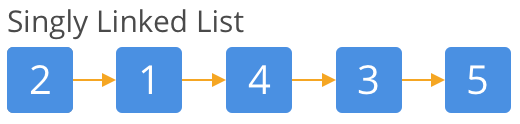

This connection is typically implemented by setting the next attribute on a node object itself.

In [1]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

In [3]:
# A small linked list:
head = Node(1)
head.next = Node(2)

Above we have a simple linked list with two elements, `[1, 2]`. Usually you'll want to create a LinkedList class as a wrapper for the nodes themselves and to provide common methods that operate on the list. For example you can implement an append method that adds a value to the end of the list. Note that if we're only tracking the head of the list, this runs in linear time - <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>O</mi>
  <mo stretchy="false">(</mo>
  <mi>N</mi>
  <mo stretchy="false">)</mo>
</math> - since you have to iterate through the entire list to get to the tail node. However, prepending (adding to the head of the list) can be done in constant <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>O</mi>
  <mo stretchy="false">(</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math> time. You'll implement this prepend method in the Linked List Practice notebook.

In [4]:
class LinkedList:
    def __init__(self):
        self.head = None
        
    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return 
        # Move to the tail (the last node)
        node = self.head
        while node.next:
            node = node.next
        
        node.next = Node(value)
        return

In [5]:
linked_list = LinkedList()
linked_list.append(1)
linked_list.append(2)
linked_list.append(4)

node = linked_list.head
while node:
    print(node.value)
    node = node.next

1
1
2
4


* `Exercise`: Add a method `to_list()` to LinkedList that converts a linked list back into a Python list

In [16]:
class LinkedList:
    def __init__(self):
        self.head = None
        
    def append(self, value):
        if self.head is None:
            self.head = Node(value)
            return
        
        # Move to the tail (the last node)
        node = self.head
        while node.next:
            node = node.next
        
        node.next = Node(value)
        return
    
    def to_list(self):
        node_values = []
        node = self.head
        while node:
            node_values.append(node.value)
            node = node.next
        return node_values


In [17]:
# Test your method here
linked_list = LinkedList()
linked_list.append(3)
linked_list.append(2)
linked_list.append(-1)
linked_list.append(0.2)

print ("Pass" if  (linked_list.to_list() == [3, 2, -1, 0.2]) else "Fail")

Pass


## Doubly Linked Lists


* This type of `list` has connections backwards and forwards through the list.
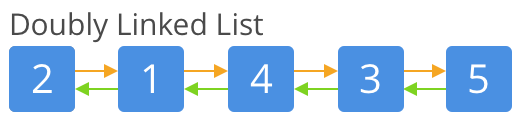

In [18]:
class DoubleNode:
    def __init__(self, value):
        self.value = value
        self.next = None
        self.previous = None

* `Exercise`: 
Implement a doubly linked list that can append to the tail in constant time. Make sure to include forward and backward connections when adding a new node to the list.

In [20]:
# Solution

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
    
    def append(self, value):
        if self.head is None:
            self.head = DoubleNode(value)
            self.tail = self.head
            return
            
        self.tail.next = DoubleNode(value)
        self.tail.next.previous = self.tail
        self.tail = self.tail.next
        return

In [21]:
# Test your class here

linked_list = DoublyLinkedList()
linked_list.append(1)
linked_list.append(-2)
linked_list.append(4)

print("Going forward through the list, should print 1, -2, 4")
node = linked_list.head
while node:
    print(node.value)
    node = node.next

print("\nGoing backward through the list, should print 4, -2, 1")
node = linked_list.tail
while node:
    print(node.value)
    node = node.previous

Going forward through the list, should print 1, -2, 4
1
-2
4

Going backward through the list, should print 4, -2, 1
4
-2
1


## Circular Linked Lists

Circular linked lists occur when the chain of nodes links back to itself somewhere. For example `NodeA -> NodeB -> NodeC -> NodeD -> NodeB` is a circular list because NodeD points back to NodeB creating a loop `NodeB -> NodeC -> NodeD -> NodeB`.
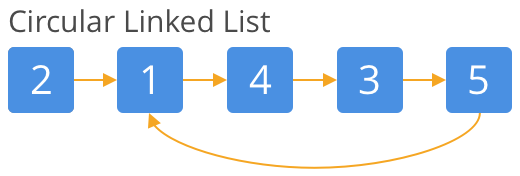
A circular linked list is typically considered pathological because when you try to iterate through it, you'll never find the end. We usually want to detect if there is a loop in our linked lists to avoid these problems. You'll get a chance to implement a solution for detecting loops later in the lesson.